In [1]:
"""
CS 677 Data Science with Python
#########################################
Module          - HW 3
Creation Date   - 17/02/2018
Student Name    - Gautam Gowrishankar
"""
import os
import pandas as pd
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from statistics import median,mean



input_dir = r'/Users/arun/Downloads/CS677 - PY/'
input_file  = os.path.join(input_dir, 'GPS_MOD.csv')

df = pd.read_csv(input_file)


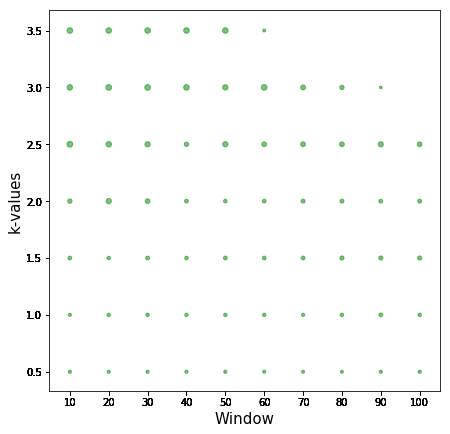

In [3]:
#bollinger strategy
def Bollinger(year, w, k):
    stDev = df.loc[df['Year'] == year]['Adj Close'].rolling(window=w, min_periods=1).std()
    mvAvrg = df.loc[df['Year'] == year]['Adj Close'].rolling(window=w, min_periods=1).mean()
    price = df.loc[df['Year'] == year]['Adj Close']
    ownStock = False
    win,loss = [],[]
    numberOfShares,stockCost,revenue = 0,0,0
    
    for ma, sd, adj in zip(mvAvrg, stDev, price):
        if adj < (ma + k * sd):
            numberOfShares = 100 // adj #$100 as the investment
            stockCost = adj
            ownStock = True
                
        elif ownStock and (adj > (ma - k * sd)):
            revenue = (adj * numberOfShares) - (stockCost * numberOfShares)
            ownStock = False
            win.append(round(revenue,3)) if revenue > 0 else loss.append(round(revenue,3))
    return win, loss


def prepData(df):
    data = np.array([])
    for w in df.index:
        data = np.append(data, df.loc[w])
    return data

#visualization axis
def prepAxis(df):
    index = list(df.index)
    column = list(df.columns)
    x = []
    for i in index:
        for c in range(len(column)):
            x.append(i)
    y = column * len(index)
    return x, y

#Implementing Bollinger strategy
window = list(range(10, 110, 10))
dictProf = {'W':window}
dictLoss = {'W':window}

for k in (0.5 * x for x in range(1,8)):
    gain,loss = [],[]
    for w in window:
        earned, lost = Bollinger(2017, w, k)
        gain.append(round(mean(earned),3)) if earned else earned.append(0)
        loss.append(mean(lost)) if lost else loss.append(0)
    dictProf[k] = gain
    dictLoss[k] = loss 
    
gainDF = pd.DataFrame({ key:pd.Series(value) for key, value in dictProf.items() }).set_index("W")
lossDF = pd.DataFrame({ key:pd.Series(value) for key, value in dictLoss.items() }).set_index("W")

#plotting
XcordGain, YcordGain = prepAxis(gainDF)
XcordLoss, YcordLoss = prepAxis(lossDF)
plt.figure(figsize=(7,7))
plt.xticks(XcordGain)
plt.yticks(YcordGain)
plt.scatter(XcordGain, YcordGain, s = prepData(gainDF) * 5, color = 'g', alpha = 0.5)
plt.scatter(XcordLoss, YcordLoss, s = prepData(lossDF) * -5, color = 'r', alpha = 0.5 )
plt.xlabel('Window', fontsize=15)
plt.ylabel('k-values', fontsize=15)
plt.show()
#Plot indicative of profitable strategy